# Proposale for Research Methodology

## 1. Introduction

### Majoity real estate transactions in Houston, Texas, are performed by licenced real estate agents. The platform for listing properties for sale or rent is usually called for Multiple Listing Service (MLS) and the one for Houston is delivered by Har.com. Prior to any sale of real estate brokers use different methods to determine the market price the property. One such method is called “comps” which is short for comparable sales. Comps are typically determined by comparing the property in question to other properties within a 1-mile radius, which have sold within the last year and have similar attributes (such as the same number of bedrooms, age, subdivision, square footage, pool, etc).

### In this analysis we like to test the hypothesis that having access to a private pool adds value to comps of a property compared those without such feature.

## 2. The dependent variable

### Pice per squar feet is the dependent variable that we like to test the feature of having access to private pool

## 3. Proposal

### We will test the hypothesis that the mean dolar per sqf value is the same for randomly selected properties, irrespective they have access to a private pool or not. The result of this hypotheis has a practicle implication for real estate transactions. A typical private pool will cost several thousandts of dollars to build and will cost more in monthly maintenance costs for many years. Therefore, one should consider if it is better decision to buy a house without a pool and build one later or buy with an existing pool. The result of this hypothesis can potentially impact buyer's decision as to pay extra for a property if the only difference with its next best alternative is access to such private pool. Ultimately, we like to know if having access to private pool adds value to a property market price.  


### Data

### We will download actual public data, from January 01, 2020, for properties that have been sold from hcad.org. One can argue that COVID-19 may have an adverse effects on the conclusion and this is something we can test in a follow-up analysis with for example dataset from 2019 only. 

### Methodolgy

### The price per squar feet is the dependent variable and for its success metric we choose degree of significance t-test with p-vale of .05. As part of data preparation we do several tasks such as remove dollar signs, drop rental properties, count missing or bad values etc.

#### Data exploration

In [114]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import mean
from numpy import var
from math import sqrt

import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import random
from bokeh.io import curdoc, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider
from bokeh.palettes import Spectral6
from bokeh.layouts import widgetbox, row

In [115]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [116]:
# Read from pickled file
df0 = pd.read_csv(r'C:\Users\user\OneDrive - Seedergy\MAEN\Code\Projects\Courses\Thinkful2020\har mls data - 12June2020 to 22June2020.csv')

C:\Users\User\anaconda3\envs\prv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [117]:
df = df0.copy()

In [118]:
df.head(3)

,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Area,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Building SqFt,Price Sq Ft List,Price Sq Ft Sold,Lot Size,Acres,Price Acre List,Price Acre Sales,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,New Construction Desc,Pool Private,No Of Garage Cap,Style,DOM,CDOM,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date
0,71016023,Lots,Active,110,Evergreen,NaN,Burkeville,75932,Newton,$110,NaN,NaN,47.0,Toledo Villiage 5a,NaN,NaN,99 - Other,BURKEVILLE ELEMENTARY SCHOOL,BURKEVILLE MIDDLE SCHOOL,BURKEVILLE HIGH SCHOOL,NaN,$0.01,NaN,8960.0,0.2057,$535,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,KWBE01,Keller Williams Southeast Texa,WJBANGOY,Wendi Bangoy,NaN,NaN,NaN,NaN,NaN,6/22/2020 12:12,6/21/2020 0:00
1,3351600,Rental,Active,3613,Crane,2,Houston,77026,Harris,$625,NaN,NaN,2.0,Crane Street Woods Sec 02,NaN,Northside,27 - Houston,DOGAN ELEMENTARY SCHOOL,FLEMING MIDDLE SCHOOL,WHEATLEY HIGH SCHOOL,750.0,$0.83,NaN,7448.0,0.1710,"$3,655",NaN,1964.0,1.0,1.0,0.0,1.0,1.0,NaN,2.0,False,NaN,False,0.0,NaN,0,0,TXHF01,360 Realty & Management,zwingle,Wayne Comer,NaN,NaN,NaN,NaN,NaN,6/22/2020 13:54,6/22/2020 0:00
2,82066227,Rental,Active,6161,Reims Rd,NaN,Houston,77036,Harris,$700,NaN,NaN,21.0,Summerset Landing,NaN,Sharpstown Area,27 - Houston,PINEY POINT ELEMENTARY SCHOOL,REVERE MIDDLE SCHOOL,WISDOM HIGH SCHOOL,712.0,$0.98,NaN,NaN,NaN,NaN,NaN,1977.0,1.0,1.0,0.0,1.0,2.0,NaN,NaN,False,NaN,False,0.0,Traditional,0,0,RELM03,REALM Real Estate Professional,chinabo,Wayne Au,NaN,NaN,NaN,NaN,NaN,6/22/2020 21:32,6/22/2020 0:00


#### Replace NaN values with zeros for those features where the value zero meand null.

In [119]:
cols = ['List Price','Area', 'Building SqFt', 'Lot Size', 'Acres','Price Sq Ft List',
        'Year Built', 'Bedrooms', 'Baths Full', 'Baths Half', 'Baths Total',
        'Room Count', 'Fireplaces Number', 'Stories', 'No Of Garage Cap']
df[cols]=df[cols].fillna(0)
df = df.replace({'\$': ''},regex=True) 
df['Price Sq Ft List'] = pd.to_numeric(df['Price Sq Ft List'], errors='coerce')
#df["Price Sq Ft List"] = df["List Price"] / df["Building SqFt"]
# df["Price Sq Ft List"] = df["Price Sq Ft List"].str.replace(',', '').astype(float)

In [120]:
# Add a column of ones for future aggregations
df['ones'] = 1
# Map True/False to 1/0
df['New Construction'] = df['New Construction'] * 1
df['Pool Private'] = df['Pool Private'] * 1

In [121]:
df.head(2)

,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Area,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Building SqFt,Price Sq Ft List,Price Sq Ft Sold,Lot Size,Acres,Price Acre List,Price Acre Sales,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,New Construction Desc,Pool Private,No Of Garage Cap,Style,DOM,CDOM,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date,ones
0,71016023,Lots,Active,110,Evergreen,NaN,Burkeville,75932,Newton,110,NaN,NaN,47.0,Toledo Villiage 5a,NaN,NaN,99 - Other,BURKEVILLE ELEMENTARY SCHOOL,BURKEVILLE MIDDLE SCHOOL,BURKEVILLE HIGH SCHOOL,0.0,0.01,NaN,8960.0,0.2057,535,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1,1,KWBE01,Keller Williams Southeast Texa,WJBANGOY,Wendi Bangoy,NaN,NaN,NaN,NaN,NaN,6/22/2020 12:12,6/21/2020 0:00,1
1,3351600,Rental,Active,3613,Crane,2,Houston,77026,Harris,625,NaN,NaN,2.0,Crane Street Woods Sec 02,NaN,Northside,27 - Houston,DOGAN ELEMENTARY SCHOOL,FLEMING MIDDLE SCHOOL,WHEATLEY HIGH SCHOOL,750.0,0.83,NaN,7448.0,0.1710,"3,655",NaN,1964.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0,NaN,0,0.0,NaN,0,0,TXHF01,360 Realty & Management,zwingle,Wayne Comer,NaN,NaN,NaN,NaN,NaN,6/22/2020 13:54,6/22/2020 0:00,1


In [122]:
cols = ('Price Acre List','Price Acre Sales')

def replace_val(row):
        for col in cols:
            if row[col] == ',':
                row[col] = ''.astype(float)
            if row[col] == "FALSE":
                row[col] = 1
            else: 0
            
        return row
    
df = df.apply(replace_val, axis=1)

In [123]:
df.head(2)

,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Area,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Building SqFt,Price Sq Ft List,Price Sq Ft Sold,Lot Size,Acres,Price Acre List,Price Acre Sales,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,New Construction Desc,Pool Private,No Of Garage Cap,Style,DOM,CDOM,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date,ones
0,71016023,Lots,Active,110,Evergreen,NaN,Burkeville,75932,Newton,110,NaN,NaN,47.0,Toledo Villiage 5a,NaN,NaN,99 - Other,BURKEVILLE ELEMENTARY SCHOOL,BURKEVILLE MIDDLE SCHOOL,BURKEVILLE HIGH SCHOOL,0.0,0.01,NaN,8960.0,0.2057,535,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1,1,KWBE01,Keller Williams Southeast Texa,WJBANGOY,Wendi Bangoy,NaN,NaN,NaN,NaN,NaN,6/22/2020 12:12,6/21/2020 0:00,1
1,3351600,Rental,Active,3613,Crane,2,Houston,77026,Harris,625,NaN,NaN,2.0,Crane Street Woods Sec 02,NaN,Northside,27 - Houston,DOGAN ELEMENTARY SCHOOL,FLEMING MIDDLE SCHOOL,WHEATLEY HIGH SCHOOL,750.0,0.83,NaN,7448.0,0.1710,"3,655",NaN,1964.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,NaN,0.0,0.0,NaN,0,0,TXHF01,360 Realty & Management,zwingle,Wayne Comer,NaN,NaN,NaN,NaN,NaN,6/22/2020 13:54,6/22/2020 0:00,1


### Get some descriptive statistics for the data

In [124]:
# Numerical describe
df_stat = df.describe(include = [np.number]) 
df_stat.loc['dtype'] = df.dtypes
df_stat.loc['size'] = len(df)
df_stat.loc['% null'] = df.isnull().mean().round(2)
df_stat

,MLS Number,Area,Building SqFt,Price Sq Ft List,Lot Size,Acres,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,Pool Private,No Of Garage Cap,DOM,CDOM,ones
count,20307,20307,20307,20295,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,19071,18991,20307,20307,20307,20307
mean,5.05858e+07,23.0824,2147.88,97.3475,26541.2,1.64219,1845.15,3.0814,2.10602,0.469739,2.153,6.78736,0.551288,1.41446,0.135232,0.105524,1.66342,43.8292,76.8926,1
std,2.81651e+07,15.9148,2401.08,94.0759,452789,23.2474,526.213,1.26878,0.984333,0.555771,1.00845,3.71058,0.613521,1.0999,0.34198,0.307235,1.64841,88.1995,158.759,0
min,202751,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-21,-5,1
25%,2.60131e+07,10,1433,1.32,4827.5,0,1976,3,2,0,2,4,0,1,0,0,1,4,5,1
50%,5.07339e+07,21,2030,103.92,7248,0.1573,2000,3,2,0,2.1,7,1,1,0,0,2,10,16,1
75%,7.50709e+07,33,2724,136.88,10478.5,0.2365,2013,4,3,1,3,9,1,2,0,0,2,49,86,1
max,9.93032e+07,87,288174,975.95,6.355e+07,1597,2021,12,13,9,13.1,28,11,31,1,1,64,1869,4468,1
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
size,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307


In [125]:
# Non-numerical describe
df_stat = df.describe(include = ['O']) 
df_stat.loc['dtype'] = df.dtypes
df_stat.loc['size'] = len(df)
df_stat.loc['% null'] = df.isnull().mean().round(2)
df_stat

,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Price Sq Ft Sold,Price Acre List,Price Acre Sales,New Construction Desc,Style,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date
count,20307,20307,20304,20307,2115,20307,20307,20307,20307,4676,4676,19974,3143,19317,20307,20008,20195,20233,4592,14873,3506,2579,16402,20307,20307,20307,20307,10907,10907,10908,10908,18,20307,15457
unique,7,9,7966,12448,876,363,772,94,3792,1489,11,10938,110,201,182,1031,459,354,2720,13381,3377,2,108,2403,2202,8643,8511,1793,1623,7337,7034,13,8629,507
top,Single-Family,Active,0,N Texas Ave,B,Houston,77494,Harris,"1,500","1,500",6/15/2020 0:00,None,The Woodlands,Katy - Southwest,27 - Houston,GISD OPEN ENROLL,HOGG MIDDLE SCHOOL (HOUSTON),LAMAR HIGH SCHOOL (HOUSTON),0.95,"30,000",,To Be Built/Under Construction,Traditional,EXPD01,Keller Williams Realty,zainkhan,Lance Loken,nonmls,Non-MLS,nonmls,Non-MLS Agent,Panza Verde Residential Partne,6/14/2020 0:10,6/19/2020 0:00
freq,12002,6235,387,66,135,7095,449,11061,199,65,978,128,478,616,4430,452,479,926,37,14,11,1581,12191,429,1090,194,220,712,712,456,712,6,67,1041
dtype,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
size,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307
% null,0,0,0,0,0.9,0,0,0,0,0.77,0.77,0.02,0.85,0.05,0,0.01,0.01,0,0.77,0.27,0.83,0.87,0.19,0,0,0,0,0.46,0.46,0.46,0.46,1,0,0.24


## Does having private pool add value to the property?

In [126]:
# We drop rows with missing pool data and this should not casue any problem as they stand for 6% of total dataset
df = df.dropna(subset=['Pool Private'])
# Drop NaN from Price Sq Ft List $/SQF as these were calcualted from dividing Price Sq Ft List with lost size
df = df.dropna(subset=['Price Sq Ft List'])
# Remove rentals as the the rent since, being much smaller than listing price, distorsts the analysis
df = df[df['Property Type'] != 'Rental']

In [127]:
# How large is each group?
print('test sample size:', len(df[df['Pool Private'] == 1]))
print('control sample size:', len(df[df['Pool Private'] == 0]))
print('test proportion:', len(df[df['Pool Private'] == 1])/ len(df))
print()

# Are the test and control groups significantly different?
stats.ttest_ind(df[df['Pool Private'] == 1]['Price Sq Ft List'],   df[df['Pool Private'] == 0]['Price Sq Ft List'])

test sample size: 1764
control sample size: 11792
test proportion: 0.13012688108586604



Ttest_indResult(statistic=14.454940984116263, pvalue=5.217380454704521e-47)

### p-value is less than 0.05 and based on this we can reject the null hypothesis and claim that there is a difference in price for properties with access to private pool. However, we also need to check if the assumption of normality is not violated in this t-test. We will do this both visually and with Shapiro-Wilk test statistic

DescribeResult(nobs=1764, minmax=(0.0, 975.95), mean=169.5242403628118, variance=10905.940185185527, skewness=3.0061045662014387, kurtosis=12.103304788127028)
DescribeResult(nobs=11792, minmax=(0.0, 935.83), mean=139.83745590230666, variance=5809.199026976259, skewness=2.7780603773444685, kurtosis=14.330586918184892)


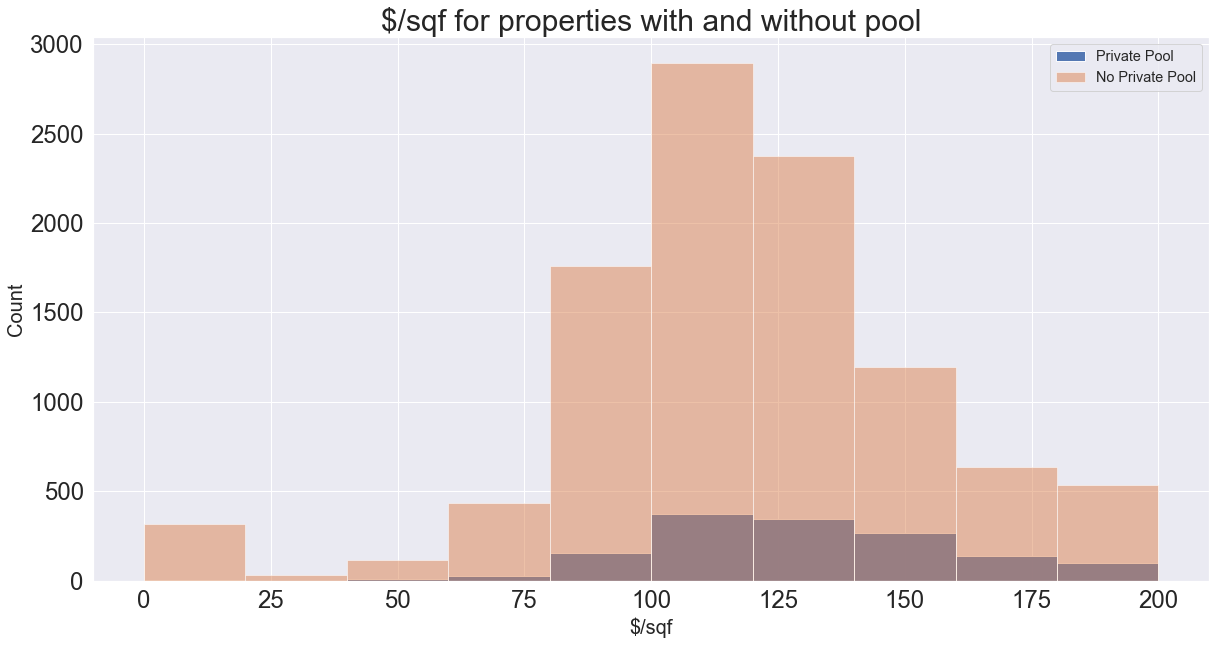

In [128]:
print(stats.describe(df[df['Pool Private'] == 1]['Price Sq Ft List']))
print(stats.describe(df[df['Pool Private'] == 0]['Price Sq Ft List']))
plt.figure(figsize=(20,10))

plt.hist(df[df['Pool Private'] == 1]['Price Sq Ft List'], bins=10, range=(0, 200), alpha = .95, label='Private Pool')
plt.hist(df[df['Pool Private'] == 0]['Price Sq Ft List'], bins=10, range=(0, 200), alpha = .5,  label='No Private Pool')
plt.xlabel("$/sqf", size=20)
plt.ylabel("Count", size=20)
plt.legend(loc='upper right', fontsize='x-large', title_fontsize='40')
plt.title("$/sqf for properties with and without pool", size=30)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 24)
plt.show()

In [129]:
print(stats.shapiro(df[df['Pool Private'] == 0]['Price Sq Ft List']))
print(stats.shapiro(df[df['Pool Private'] == 1]['Price Sq Ft List']))

(0.7661536931991577, 0.0)
(0.6872397661209106, 0.0)


C:\Users\User\anaconda3\envs\prv\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### The shape is not a perfect bell-shape however and this is also confirmed by W statistc between 0.7 to 0.8 indicating that the distribution is not very close to a normal distribution

#### Another option for comparing the frequencies is with boxplot

No handles with labels found to put in legend.


<Figure size 1440x720 with 0 Axes>

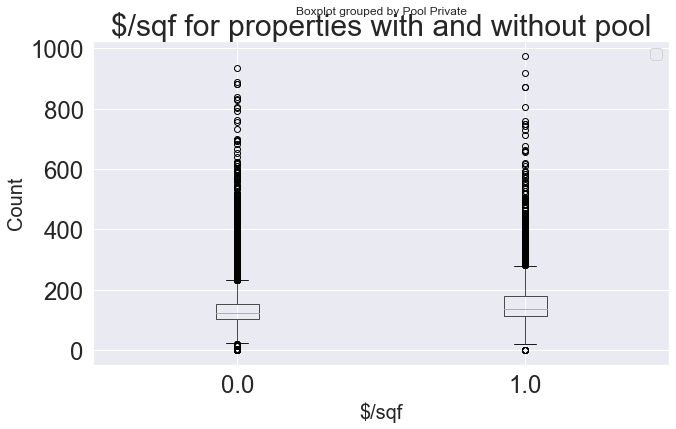

In [130]:
#Create a boxplot
plt.figure(figsize=(20,10))
df.boxplot('Price Sq Ft List', by='Pool Private', figsize=(10, 6))
plt.xlabel("Has Pool:No=0, Yes=1", size=20)
plt.ylabel("Count", size=20)
plt.legend(loc='upper right', fontsize='x-large', title_fontsize='40')
plt.title("$/sqf for properties with and without pool", size=30)
plt.xlabel("$/sqf", size=20)
plt.ylabel("Count", size=20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 24)
plt.show()

## The t-test at .05 significance proved that there is a difference in mean values of these two groups. Now we should calculate the scale of this difference so to see the real life implication of such difference. This is called the effect size.

### For the effect size we will use Cohen’s d that measures the difference between the mean from two Gaussian-distributed variables. This assumption allows us to use the standard score and summarizes the difference in terms of the number of standard deviations. And here is one interpretation of such standarization:Small Effect Size: d=0.20, Medium Effect Size: d=0.50, Large Effect Size: d=0.80.

In [131]:
# function to calculate cohen's d for independet samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate teh variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    #calculate the pooled standard deviation
    s = sqrt(((n1 -1) * s1 + (n2 -1) *s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [132]:
# function to calcualte pooled standard deviation
def pooled_std(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate teh variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    #calculate the pooled standard deviation
    s = sqrt(((n1 -1) * s1 + (n2 -1) *s2) / (n1 + n2 - 2))
    return s

In [133]:
# Calcualte d
sample1 = df[df['Pool Private'] == 1]['Price Sq Ft List']
sample2 = df[df['Pool Private'] == 0]['Price Sq Ft List']

d = cohend(sample1, sample2)
s = pooled_std(sample1, sample2)
print('Cohen d: %3f' % d)
print ('Pooled standard deviation: %3f' % s)

Cohen d: 0.369011
Pooled standard deviation: 80.449636


### We can see that the difference between the mean is 40% of one standards deviation interpreted as a medium effect size. This implies properties with pools deviate with 32 dollar per sqf. This is too big to be true. I suspect the result is biased as more expensive properties tend to have private pool. This means our samples are not randomized properly. 

#### We can also use pointplot to represent the central tendency for these two populations. As you can see these groups are very different and it shows that very often it is the more expensive properties that have access private pool. Therefore we need to redo this analysis and start with a population where properties are similar in terms of size and value.

No handles with labels found to put in legend.


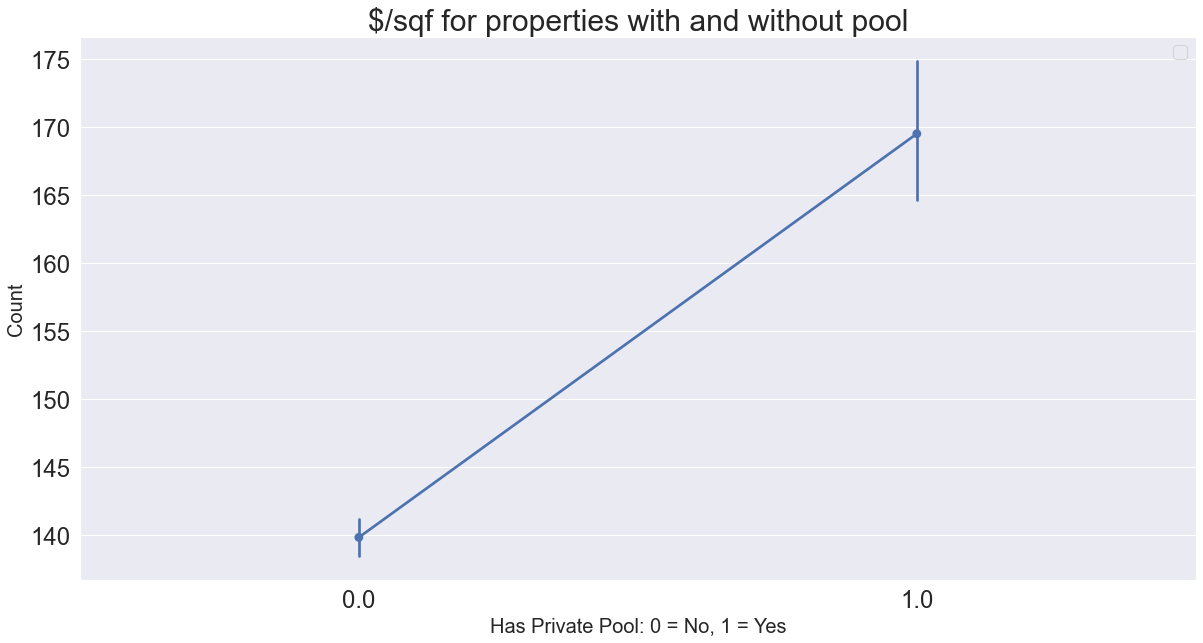

In [134]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.pointplot(x=df_plot['Pool Private'], y=df_plot['Price Sq Ft List'], data=df_plot)
plt.xlabel("Has Pool: No=0, Yes=1", size=20)
plt.ylabel("Count", size=20)
plt.legend(loc='upper right', fontsize='x-large', title_fontsize='40')
plt.title("$/sqf for properties with and without pool", size=30)
plt.xlabel("Has Private Pool: 0 = No, 1 = Yes", size=20)
plt.ylabel("Count", size=20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 24)
plt.show()

In [135]:
#check how properties with pools are in the dataset and what is the distribution of the price per sqf
df[df['Pool Private'] ==1]['Pool Private'].sum()

1764.0

### Based on above we should rerun the hypothesis test and this time focus only on property with minimum 150 dollar per sqf

In [136]:
df10 = df[['Pool Private', 'Price Sq Ft List']]
df10 = df10[df10['Price Sq Ft List'] >=150]

In [137]:
# How large is each group?

group1 = df10.loc[df['Pool Private'] == 1]['Price Sq Ft List']
group2 = df10.loc[df['Pool Private'] == 0]['Price Sq Ft List']
print('test sample size:', len(group1))
print('control sample size:', len(group2))
print('test proportion:', len(df10[df10['Pool Private'] == 1])/ len(df10))
print()

# Are the test and control groups significantly different?
stats.ttest_ind(group1, group2)

test sample size: 712
control sample size: 3167
test proportion: 0.18355246197473576



Ttest_indResult(statistic=4.821470846042902, pvalue=1.479710010767936e-06)

### The difference between these two populations is still too large to make this experiment meaningful. We can narrow down the focus but because of the size of the dataset gets smaller we may face increase in Type I Error risk (i.e. false positive or the p-value is optimistically small) also increases. One way to get a measure for such error is to calculate the Statistical Power of the hypothesis test. Also this is the probability of true positive result. This is only useful when the null hypothesis is rejected which is the case here. Furthermore, the higher the statistical power for a given experiment, the lower the probability of making a Type II (false negative) error. That is the higher the probability of detecting an effect when there is an effect.
#### Power = 1 - Type II Error
#### Pr(True Positive) = 1 - Pr(False Negative)



### First, let's assume we like to have a power of 80% for alpha = 0.05 and effect size of 80% (a kind of strong effect), then what is the required sample size?

In [138]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_size = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha)
#result = analysis.solve_power(effect, power=power, nobs1=None, ratio=0.001, alpha=alpha)
print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


### It seems our sample size is much than what we need so we should narrow down the types of properties we have selected for this analysis. But before that let's see how power change when we modify the rest of the building blocks of this power analysis.

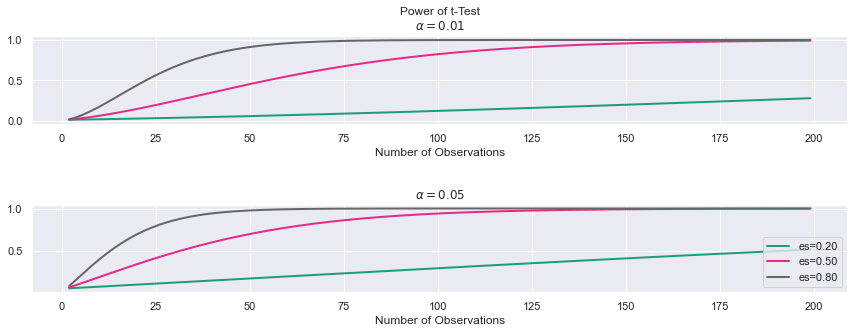

<Figure size 1440x720 with 0 Axes>

In [139]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 

# Adjust the format of plots
left  = 0.0125  # the left side of the subplots of the figure
right = 1.9    # the right side of the subplots of the figure
bottom = 0.01   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.42   # the amount of width reserved for blank space between subplots
hspace = 0.92   # the amount of height reserved for white space between subplots
plt.figure(figsize=(20,10))
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


### Based on above we can safely narrow our focus on properties in a very tight range of value per square feet and redo the hypothesis test

#### We focus onow on properties in range of 150 dollar/sqf to 250 dollar/sqf

In [140]:
df20 = df[['Pool Private', 'Price Sq Ft List']]
df20 = df10[(df10['Price Sq Ft List'] >=150) & (df10['Price Sq Ft List'] <=250)]

In [141]:
# How large is each group?

group1 = df20.loc[df['Pool Private'] == 1]['Price Sq Ft List']
group2 = df20.loc[df['Pool Private'] == 0]['Price Sq Ft List']
print('test sample size:', len(group1))
print('control sample size:', len(group2))
print('test proportion:', len(df20[df20['Pool Private'] == 1])/ len(df20))
print()

# Are the test and control groups significantly different?
stats.ttest_ind(group1, group2)

test sample size: 488
control sample size: 2359
test proportion: 0.17140850017562345



Ttest_indResult(statistic=-2.9261553075808835, pvalue=0.003458975265345916)

DescribeResult(nobs=488, minmax=(150.02, 249.96), mean=182.2042213114754, variance=751.3688297825428, skewness=0.8210897264189734, kurtosis=-0.3539369265085326)
(0.9357481002807617, 9.02579827391877e-31)
(0.9003573656082153, 2.6287507044998376e-17)


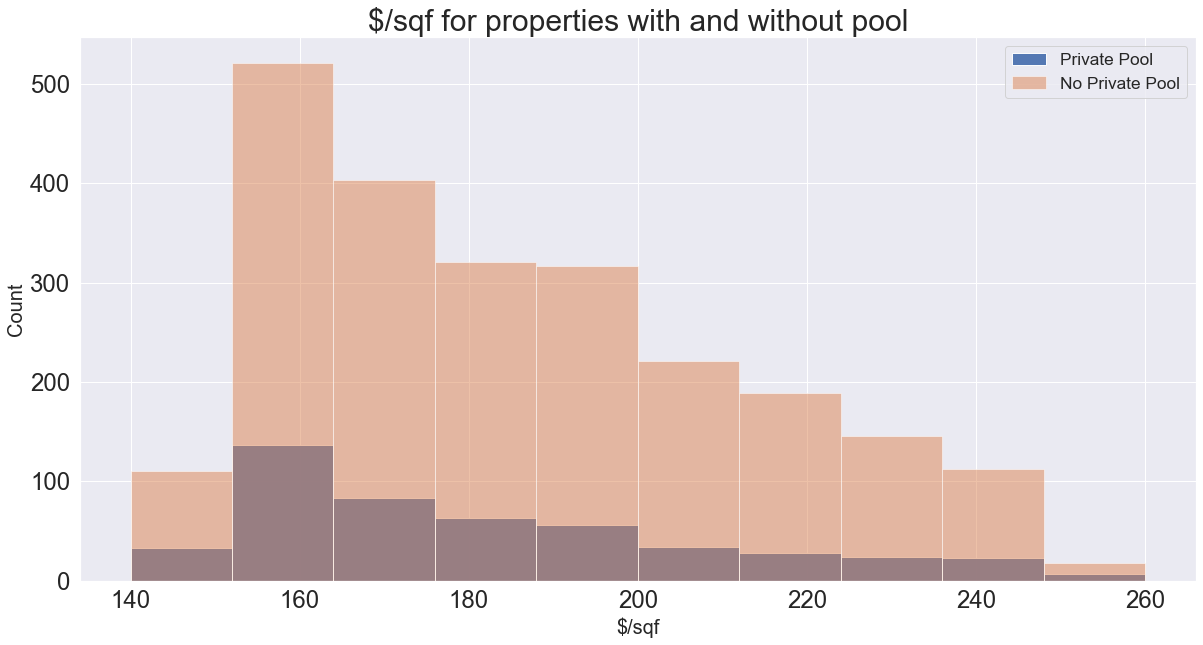

In [142]:
print(stats.describe(df20[df20['Pool Private'] == 1]['Price Sq Ft List']))

print(stats.shapiro(df20[df20['Pool Private'] == 0]['Price Sq Ft List']))
print(stats.shapiro(df20[df20['Pool Private'] == 1]['Price Sq Ft List']))

plt.figure(figsize=(20,10))

plt.hist(group1, bins=10, range=(140, 260), alpha = .95, label='Private Pool')
plt.hist(group2, bins=10, range=(140, 260), alpha = .5, label='No Private Pool')

plt.xlabel("$/sqf", size=20)
plt.ylabel("Count", size=20)
plt.legend(loc='upper right', fontsize='x-large', title_fontsize='40')
plt.title("$/sqf for properties with and without pool", size=30)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 24)
plt.show()

### p-value is less than 0.05 and based on this we can reject the null hypothesis and claim that there is a difference in price for properties with access to private pool. 

No handles with labels found to put in legend.


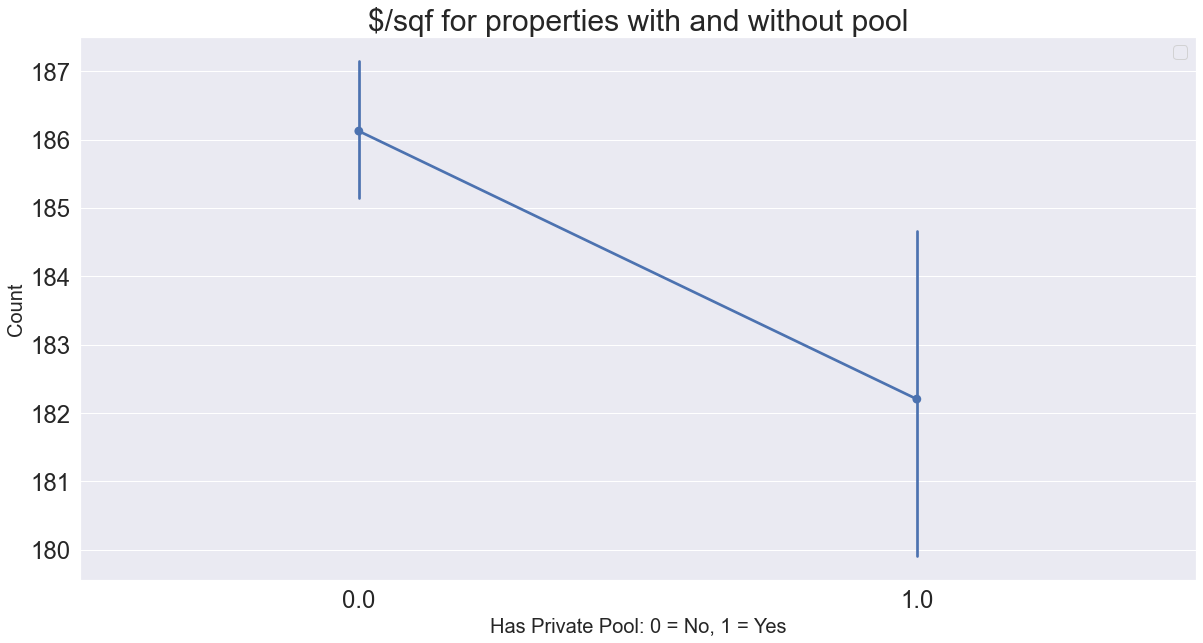

In [143]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sns.pointplot(x=df20['Pool Private'], y=df20['Price Sq Ft List'], data=df20)
plt.xlabel("Has Pool: No=0, Yes=1", size=20)
plt.ylabel("Count", size=20)
plt.legend(loc='upper right', fontsize='x-large', title_fontsize='40')
plt.title("$/sqf for properties with and without pool", size=30)
plt.xlabel("Has Private Pool: 0 = No, 1 = Yes", size=20)
plt.ylabel("Count", size=20)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.tick_params(axis = 'both', which = 'major', labelsize = 24)
plt.show()

### Below are extra vizualization for the dataset

In [147]:
df['year'] = pd.DatetimeIndex(df['List Date ']).year

# Make the ColumnDataSource: source
source = ColumnDataSource(data={
    'x': df['Building SqFt'],
    'y': df['Price Sq Ft List'],
    'county': df[(df['County'] == 'Harris') | (df['County'] == 'Fort Bend')]['County'],
    'zip': df['Zip Code'],
})

In [148]:

# Save the minimum and maximum values of the gdp column: xmin, xmax
xmin, xmax = min(df['Building SqFt']), max(df['Building SqFt'])

# Save the minimum and maximum values of the co2 column: ymin, ymax
ymin, ymax = min(df['Price Sq Ft List']), max(df['Price Sq Ft List'])


In [149]:
# Create the figure: plot
plot = figure(title=' Real Estate', 
              plot_height=600, plot_width=900,
              x_range=(xmin, xmax),
              y_range=(ymin, ymax), y_axis_type='log')

In [159]:
# Add circle glyphs to the plot
county_selected = ['Harris', 'Fort Bend']
color_mapper = CategoricalColorMapper(factors=county_selected, palette=Spectral6)
plot.circle(x='x', y='y', fill_alpha=0.8, source=source, legend='county',  color=dict(field='county', transform=color_mapper), size=7)

GlyphRenderer(id='1154', ...)

In [160]:
# Set the legend.location attribute of the plot
plot.legend.location = 'bottom_right'

# Set the x-axis label
plot.xaxis.axis_label = 'Building $/sqf'

# Set the y-axis label
plot.yaxis.axis_label = 'Price $/sqf'

In [161]:
show(plot)

In [162]:
from scipy import stats
#remove outliers
df = df[(np.abs(stats.zscore(df[['Building SqFt','Price Sq Ft List']])) < 3).all(axis=1)]

### Static Hexagonal Binning Plot

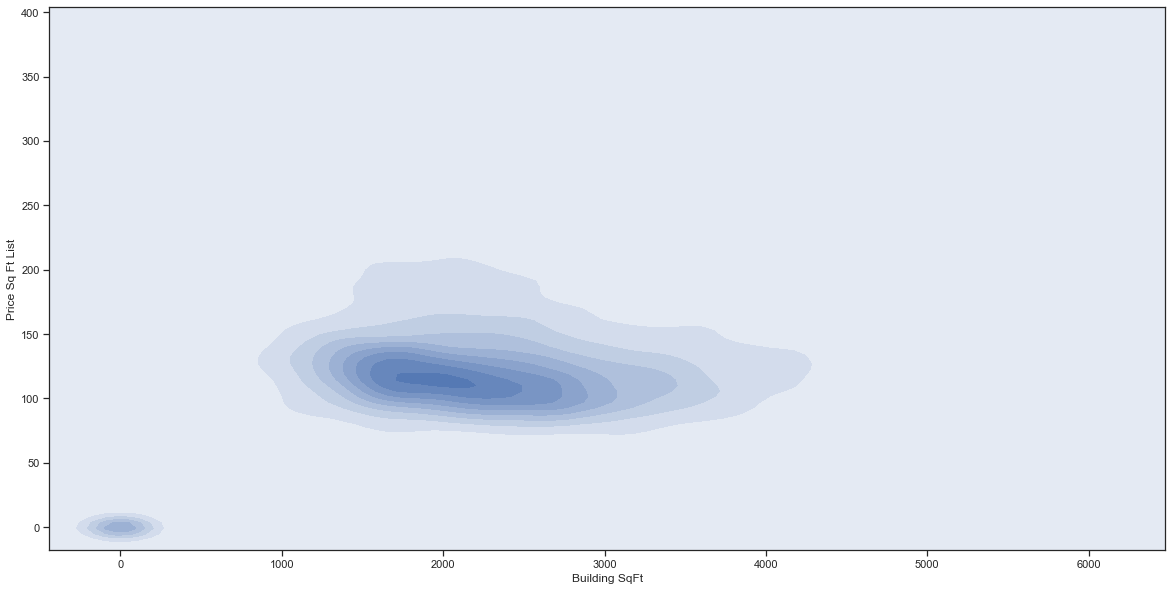

In [155]:
# generate KDE plot: first two parameters are arrays of X and Y coordinates of data points
# parameter shade is set to True so that the contours are filled with a color gradient based on number of data points
plt.figure(figsize=(20,10))
sns.kdeplot(df['Building SqFt'],df['Price Sq Ft List'], shade=True)

In [156]:
df.head(2)

,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Area,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Building SqFt,Price Sq Ft List,Price Sq Ft Sold,Lot Size,Acres,Price Acre List,Price Acre Sales,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,New Construction Desc,Pool Private,No Of Garage Cap,Style,DOM,CDOM,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date,ones,year
332,74442905,Mid/Hi-Rise Condo,Active,2400,Mccue,255,Houston,77056,Harris,"2,650",NaN,NaN,22.0,2400 Mccue Condos,NaN,Galleria,27 - Houston,BRIARGROVE ELEMENTARY SCHOOL,TANGLEWOOD MIDDLE SCHOOL,WISDOM HIGH SCHOOL,1244.0,2.13,NaN,0.0,0.000,NaN,NaN,2001.0,2.0,2.0,0.0,2.0,5.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0,0,CKPL01,Winhill Advisors - Kirby,Kriegel,Charlie Kriegel,NaN,NaN,NaN,NaN,NaN,6/22/2020 11:23,6/22/2020 0:00,1,2020.0
400,2891103,Country Homes/Acreage,Active,0,Speights,NaN,Hankamer,77560,Chambers,"15,000",NaN,NaN,53.0,B,NaN,Chambers County East,4 - Anahuac,ANAHUAC ELEMENTARY SCHOOL,ANAHUAC MIDDLE SCHOOL,ANAHUAC HIGH SCHOOL,0.0,0.00,NaN,0.0,0.873,"17,182",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,2,2,DEGP01,Doug Erdy Group,caspeigh,Christie Speights,NaN,NaN,NaN,NaN,NaN,6/20/2020 13:11,6/20/2020 0:00,1,2020.0


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

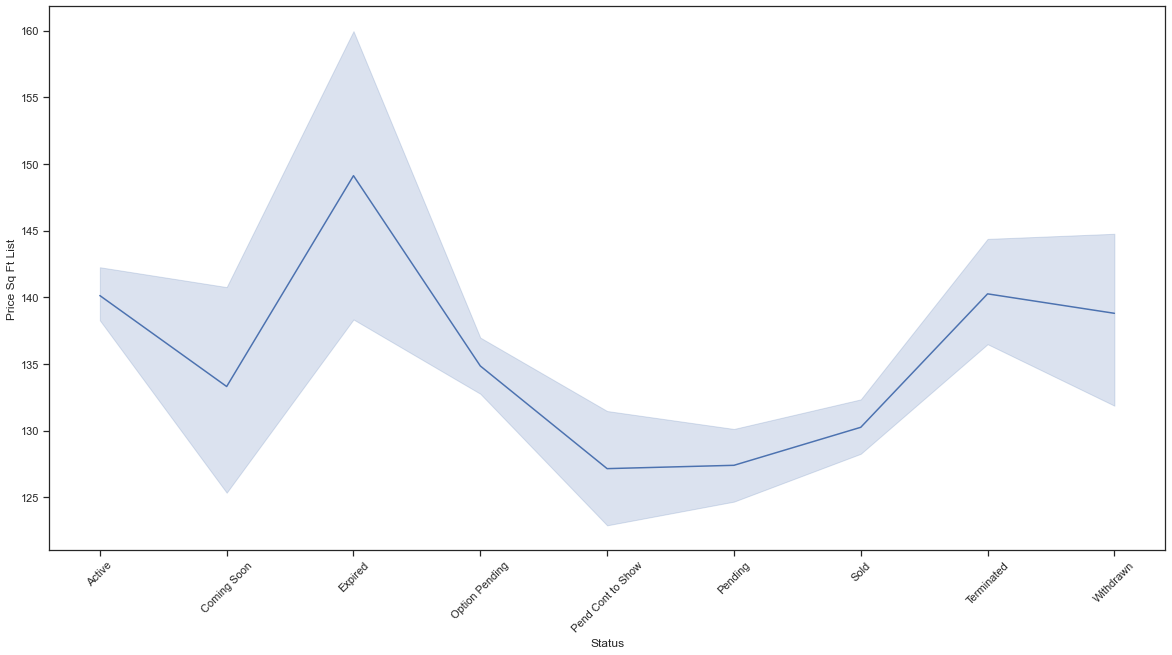

In [157]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Status", y=df['Price Sq Ft List'], data=df)
plt.xticks(rotation=45)

#### As we can see, the points connected by the solid line represent the mean of the y axis feature at the corresponding x coordinate. The shaded area around the line plot shows the confidence interval for the y axis feature (by default, seaborn sets this to a 95% confidence interval).